In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
import cmasher as cmr
import seaborn as sns

[]


(0.0, 4096.0)

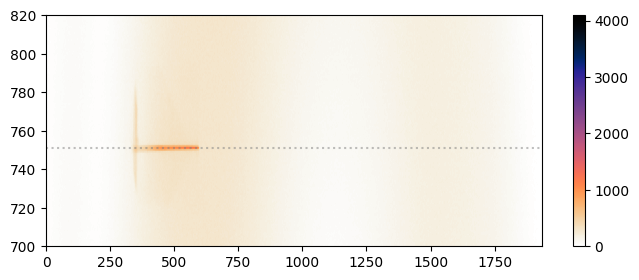

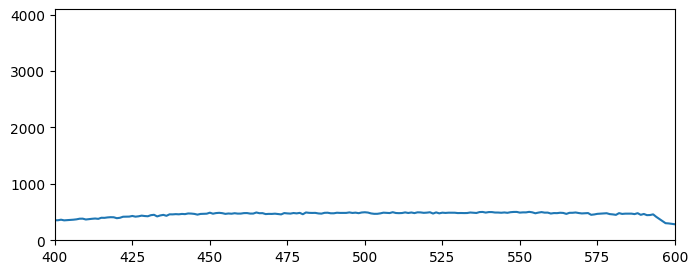

In [30]:
DIR = r'C:\Users\kalos\Documents\PMoPA_files\DAQ\240320\tscan\50mbar\BMdelay500\tp0ns\FluorescenceCam'

filenames = glob.glob(os.path.join(DIR, 'bg*.tif'))
print(filenames)

filenames=[r"C:\Users\kalos\Documents\PMoPA_files\DAQ\240320\BMdelay520\50mbar\t0p0ns\FluorescenceCam\shot_073_17-00-26.295.tif"]
filenames = [r"C:\Users\kalos\Documents\PMoPA_files\DAQ\240320\BMdelay490\100mbar\t0p0ns\FluorescenceCam\bg_003_17-39-19.718.tif"]
filenames=[r"C:\Users\kalos\Documents\PMoPA_files\DAQ\240321\fluorescence_backfill\BMdelay490\100mbar\FluorescenceCam\bg_002_17-43-11.570.tif",
           r"C:\Users\kalos\Documents\PMoPA_files\DAQ\240321\fluorescence_backfill\BMdelay490\40mbar\FluorescenceCam\bg_002_17-53-53.533.tif"]

shotIdx = 1

im = cv2.imread(filenames[shotIdx],-1)
bkg = im[0:25,0:25]
im = im - np.mean(bkg)
im[im<0] = 0

lineoutIdx = 751
d = 5
lineout = np.mean(im[lineoutIdx-d:lineoutIdx+d,:], axis=0)

plt.figure(figsize=(8,3))
plt.imshow(im, aspect='auto', origin='lower', vmin=0, vmax=2**12, cmap=cmr.torch_r)
plt.axhline(lineoutIdx, ls=':', color=[0.5,0.5,0.5,0.5])
plt.colorbar()
plt.ylim(700,820)

plt.figure(figsize=(8,3))
plt.plot(lineout)
plt.xlim(400, 600)
plt.ylim(0, 2**12)

Text(0.5, 1.0, '50 mbar')

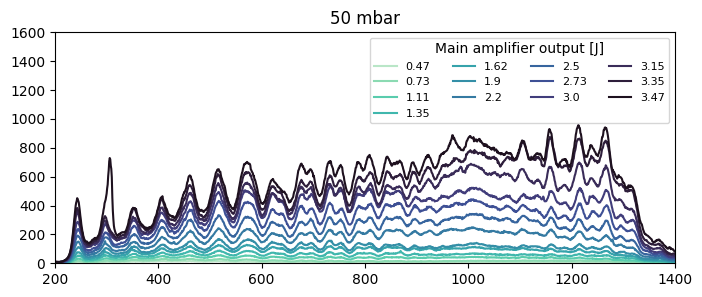

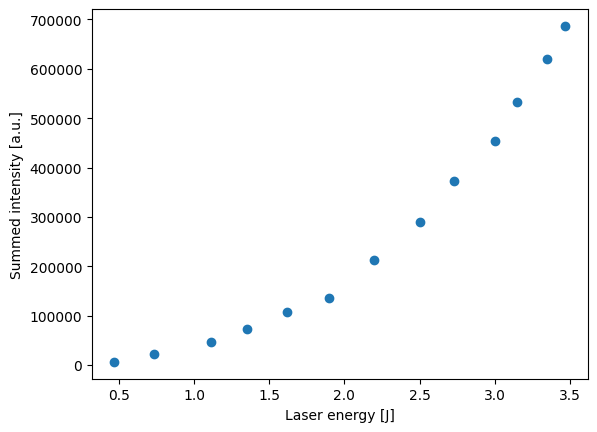

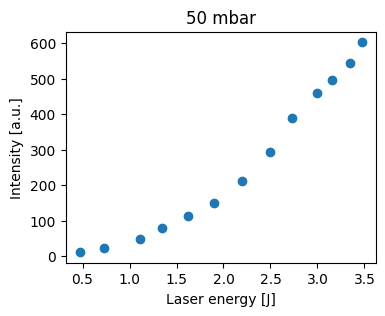

In [70]:
delays = [630, 610, 590, 580, 570, 560, 550, 540, 530, 520, 510, 500, 490]
energies = [0.47, 0.73, 1.11, 1.35, 1.62, 1.9, 2.2, 2.5, 2.73, 3.0, 3.15, 3.35, 3.47]

# name = ['shot', 'bg', 'bg', 'shot', 'bg', 'bg', 'shot', 'bg', 'bg', 'shot', 'shot', 'shot', 'bg'] # 100 mbar
name = ['shot', 'bg', 'bg', 'bg', 'shot', 'bg', 'bg', 'bg', 'bg', 'shot', 'bg', 'bg', 'shot'] # 50 mbar
# name = ['shot', 'bg', 'shot', 'bg', 'bg', 'bg', 'bg', 'shot', 'shot', 'shot', 'bg', 'bg', 'bg'] # 25 mbar

cols = sns.color_palette('mako_r', n_colors=len(delays))

sums = np.zeros((len(delays),))
peaks = np.zeros((len(delays),))

plt.figure(figsize=(8,3))

for i in range(len(delays)):
    DIR = r'C:\Users\kalos\Documents\PMoPA_files\DAQ\240314\Escan\50mbar\BMdelay{:03d}\t0p0ns\FluorescenceCam'.format(delays[i])

    filenames = glob.glob(os.path.join(DIR, '{}*.tif'.format(name[i])))

    shotIdx = 30

    im = cv2.imread(filenames[shotIdx], -1)
    bkg = im[0:25,0:25]
    im = im - np.mean(bkg)
    im[im<0] = 0

    lineoutIdx = 200
    d = 4
    lineout = np.mean(im[lineoutIdx-d:lineoutIdx+d,:], axis=0)

    highcountsBool = lineout > 10
    sums[i] = np.sum(lineout[highcountsBool])
    peaks[i] = np.mean(lineout[580:590])

    plt.plot(lineout, label=energies[i], color=cols[i])

plt.legend(ncol=4, fontsize=8, title='Main amplifier output [J]')
plt.xlim(200, 1400)
plt.ylim(0, 1.6e3)
plt.title('50 mbar')

plt.figure()
plt.scatter(energies, sums)
plt.xlabel('Laser energy [J]')
plt.ylabel('Summed intensity [a.u.]')


plt.figure(figsize=(4,3))
plt.scatter(energies, peaks)
plt.xlabel('Laser energy [J]')
plt.ylabel('Intensity [a.u.]')
plt.title('50 mbar')

In [379]:
import os
import glob
common_folder_path = r"C:\Users\kalos\Documents\PMoPA_files\DAQ\240321\fluorescence_backfill\BMdelay490"
common_folder_path_fri = r"C:\Users\kalos\Documents\PMoPA_files\DAQ\240322\fluorescence_backfill\BMdelay490"
bg_shotlist = glob.glob(common_folder_path + "\\" + r"bg\FluorescenceCam\*" + 'shot' + r"*")

pressures = [9,20,30,40,50,60,70,80,90,100]
pressures_fri = [10,15,18,20,22,25,30,35,37,40,42,45,47,50,52,55,60]

iota_delays = [945,950,955,960,965]
iota_open_ms = [5,10,20] #opening times of the iota gas jet [ms]
#iota_BPs = [2,3,4,5] #backing pressures of the gas jet
iota_BPs = []

iota_delays_fri =[950,955,957,958,959,960,961,962,963,964,965,966,968,970,975]
iota_open_ms_fri = [3,4,5,6,7,8,9,10,15]
iota_BPs_fri = [2,4,6,8]

iota_delays_unique = list(np.sort(list(set(iota_delays+iota_delays_fri))))
iota_open_ms_unique = list(np.sort(list(set(iota_open_ms+iota_open_ms_fri))))
iota_BPs_unique = list(np.sort(list(set((iota_BPs + iota_BPs_fri)))))

print(iota_delays_unique)
print(iota_open_ms_unique)
print(iota_BPs_unique)

results_cube = np.zeros((len(iota_delays_unique), len(iota_open_ms_unique), len(iota_BPs_unique)))
avg_sigs = np.zeros(len(pressures))
avg_sigs_fri = np.zeros(len(pressures_fri))

def load_and_calculate_average(filenames):
    # Initialize an empty array to store pixel values
    total_sum = None
    # Iterate over each filename
    for filename in filenames:
        # Load the image
        image = cv2.imread(filename, -1)
        # If this is the first image, initialize total_sum with zeros
        if total_sum is None:
            total_sum = np.zeros_like(image, dtype=np.uint64)
        # Add the pixel values of the current image to the total_sum
        total_sum += image.astype(np.uint64)
    # Calculate the average pixel value
    average_image = total_sum / len(filenames)
    return average_image

def get_avg_signal(shotlist,bg_shotlist,plot_flag, title):

    if len(shotlist) == 0:
        return 0
    else:
        average_image = load_and_calculate_average(shotlist)
        average_image_bg = load_and_calculate_average(bg_shotlist)

        im = average_image - average_image_bg
        im[im<0] = 0

        lineoutIdx = 752
        start = 450
        stop = 530
        d = 3
        lineout = np.mean(im[lineoutIdx-d:lineoutIdx+d,:], axis=0)
        avg_sig = np.mean(lineout[start:stop])

        if plot_flag:
            fig, axs = plt.subplots(1,2, figsize=(10,3))
            axs[0].imshow(im, aspect='auto', origin='lower', vmin=0, vmax=2**12, cmap=cmr.torch_r)
            axs[0].axhline(lineoutIdx, ls=':', color=[0.5,0.5,0.5,0.5])
            axs[0].set_xlim(200, 800)
            axs[0].set_ylim(730, 770)
            axs[0].set_xlabel('X [pix]')
            axs[0].set_ylabel('Y [pix]')

            axs[1].plot(lineout)
            axs[1].set_xlim(250, 650)
            
            axs[1].axvline(start,ls='dotted',color='black')
            axs[1].axvline(stop,ls='dotted',color='black')
            axs[1].set_title('lineout: avg fluorescence signal')
            axs[1].set_xlabel('loc [pix]')
            axs[1].set_ylabel('avg pixel value')


            axs[1].axhline(avg_sig,color='red',ls='dashed')
            axs[0].set_title('Fluorescence camera: '+title)
        return avg_sig


#for pressure,i in zip(pressures,range(len(pressures))):
#    shotlist = glob.glob(common_folder_path + "\\" +str(pressure) + r"mbar\FluorescenceCam\*" + 'shot' + r"*")
#    avg_sigs[i] = get_avg_signal(shotlist,bg_shotlist,plot_flag=False, title=str(pressure)+ " mbar")

for pressure,i in zip(pressures_fri,range(len(pressures_fri))):
    shotlist = glob.glob(common_folder_path_fri + "\\" +str(pressure) + r"mbar\FluorescenceCam\*" + 'shot' + r"*")
    avg_sigs_fri[i] = get_avg_signal(shotlist,bg_shotlist,plot_flag=False, title=str(pressure)+ " mbar")

[945, 950, 955, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 968, 970, 975]
[3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
[2, 4, 6, 8]


[ 51.27238005  73.99693813  77.98721591  79.37818813  69.4061553
 134.93197601 166.7978851  182.73746843 163.05748106 178.94510732
   0.         242.82013889 193.63036616 232.96720328 259.7301452
 241.02935606 302.45246212]


Text(0.5, 1.0, 'Thursday')

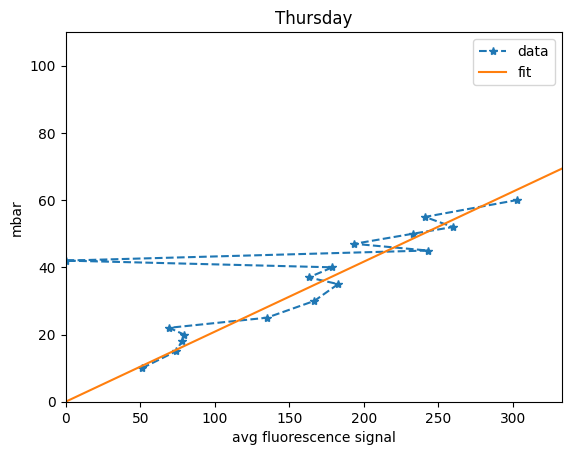

In [290]:
avg_sigs=avg_sigs_fri
pressures=pressures_fri

print(avg_sigs)

plt.plot(avg_sigs,pressures, '--*',label='data')
plt.ylabel('mbar')
plt.xlabel('avg fluorescence signal')

plt.xlim(0,1.1*max(avg_sigs))

mbar_per_sig = np.dot(avg_sigs,pressures) / np.dot(avg_sigs,avg_sigs)

xfit = np.linspace(0,1.1*max(avg_sigs),100)
yfit = mbar_per_sig*xfit

plt.plot(xfit,yfit,label='fit')
plt.ylim(0,110)

plt.legend()
plt.title('Thursday')

In [380]:
for iota_delay,i in zip(iota_delays_fri,range(len(iota_delays_fri))):
    for iota_open_time, j in zip(iota_open_ms_fri, range(len(iota_open_ms_fri))):
        for iota_BP, k in zip(iota_BPs_fri, range(len(iota_BPs_fri))):
            shotlist = glob.glob(common_folder_path_fri + "\\jet" + str (iota_open_time)+ "ms" +str(iota_delay) + r"del"+str(iota_BP)+"bar\FluorescenceCam\*" + 'shot' + r"*")
            p=iota_delays_unique.index(iota_delay)
            q=iota_open_ms_unique.index(iota_open_time)
            r=iota_BPs_unique.index(iota_BP)
            results_cube[p,q,r] = get_avg_signal(shotlist,bg_shotlist,plot_flag=False, title=str(iota_delay)+ ", jet "+str(iota_open_time)+ " ms "+str(iota_BP)+" bar")

In [381]:
""" for iota_delay,i in zip(iota_delays,range(len(iota_delays))):
    for iota_open_time, j in zip(iota_open_ms, range(len(iota_open_ms))):
        for iota_BP, k in zip(iota_BPs, range(len(iota_BPs))):
            shotlist = glob.glob(common_folder_path + "\\jet" + str (iota_open_time)+ "ms" +str(iota_delay) + r"del"+str(iota_BP)+"bar\FluorescenceCam\*" + 'shot' + r"*")
            p=iota_delays_unique.index(iota_delay)
            q=iota_open_ms_unique.index(iota_open_time)
            r=iota_BPs_unique.index(iota_BP)
            results_cube[p,q,r] = get_avg_signal(shotlist,bg_shotlist,plot_flag=False, title=str(iota_delay)+ ", jet "+str(iota_open_time)+ " ms "+str(iota_BP)+" bar") """

' for iota_delay,i in zip(iota_delays,range(len(iota_delays))):\n    for iota_open_time, j in zip(iota_open_ms, range(len(iota_open_ms))):\n        for iota_BP, k in zip(iota_BPs, range(len(iota_BPs))):\n            shotlist = glob.glob(common_folder_path + "\\jet" + str (iota_open_time)+ "ms" +str(iota_delay) + r"del"+str(iota_BP)+"bar\\FluorescenceCam\\*" + \'shot\' + r"*")\n            p=iota_delays_unique.index(iota_delay)\n            q=iota_open_ms_unique.index(iota_open_time)\n            r=iota_BPs_unique.index(iota_BP)\n            results_cube[p,q,r] = get_avg_signal(shotlist,bg_shotlist,plot_flag=False, title=str(iota_delay)+ ", jet "+str(iota_open_time)+ " ms "+str(iota_BP)+" bar") '

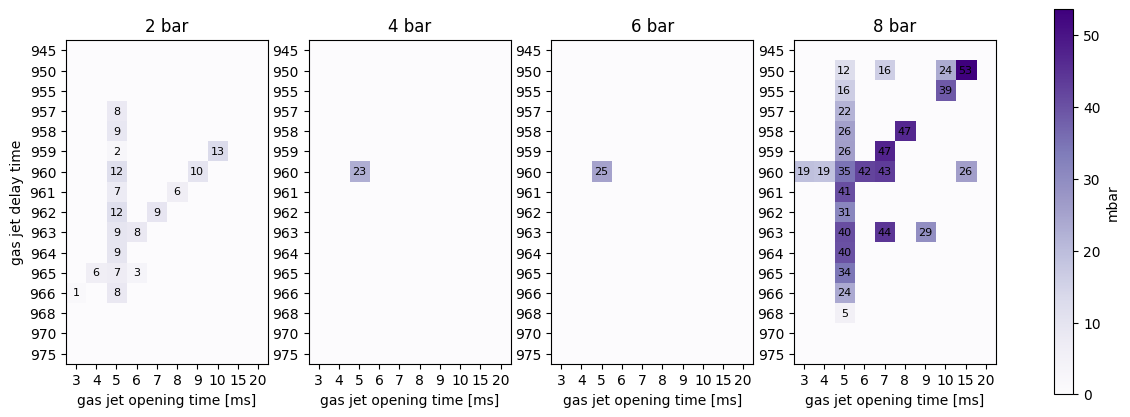

In [382]:
# Create a sample 3D array of values
array_3d = results_cube*mbar_per_sig

min_value = np.min(array_3d)
max_value = np.max(array_3d)

# Create subplots for each 2D slice
fig, axs = plt.subplots(1, array_3d.shape[2], figsize=(15, 5))  # Adjust figsize as needed

cmap = "Purples"
# Plot each 2D slice
for i in range(array_3d.shape[2]):
    axs[i].imshow(array_3d[:, :, i], cmap=cmap, vmin=min_value, vmax=max_value)  # You can use any colormap you prefer
    axs[i].set_title(f"{iota_BPs_unique[i]} bar")
    #axs[i].axis('off')  # Hide axis labels

    # Add text annotations
    for y in range(array_3d.shape[0]):
        for x in range(array_3d.shape[1]):
            if array_3d[y, x, i] > 0.1:
                axs[i].text(x, y, f'{array_3d[y, x, i]:.0f}', color='black', ha='center', va='center',fontsize=8)
    

    axs[i].set_xticks(np.arange(array_3d.shape[1]))
    axs[i].set_xticklabels(iota_open_ms_unique)
    axs[i].set_yticks(np.arange(array_3d.shape[0]))
    axs[i].set_yticklabels(iota_delays_unique)

    axs[i].set_xlabel('gas jet opening time [ms]')

axs[0].set_ylabel('gas jet delay time')

# Add color bar
cbar = fig.colorbar(axs[-1].imshow(array_3d[:, :, -1], cmap=cmap), ax=axs.ravel().tolist())
cbar.set_label('mbar')


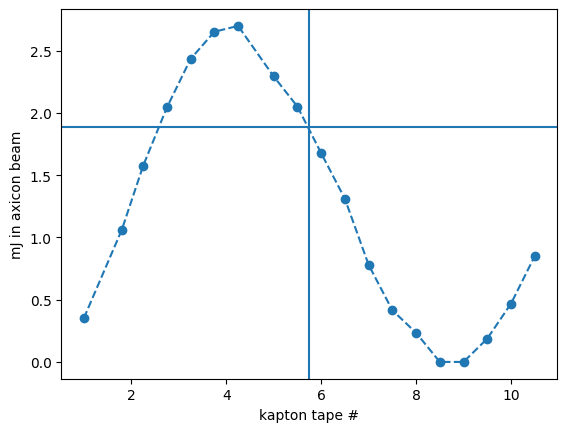

In [464]:
ene = [2.25,6.8,10.1,13.1,15.6,17.0,17.3,14.7,13.15,10.75,8.4,5.0,2.66,1.5,0,0,1.2,3,5.45]
kapton_pos = [1,1.8,2.25,2.75,3.25,3.75,4.25,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5]

plt.plot(kapton_pos,ene/np.max(ene)*2.7,'--o')
plt.xlabel('kapton tape #')
plt.ylabel('mJ in axicon beam')
plt.axhline(2.7*0.7)
plt.axvline(5.75)


In [442]:
print(2.7*0.6)

1.62


Original 'shot' image: shot_001_22-09-03.874.tif
Matched image in the second folder: shot_001_22-09-03.884.tif
Original 'shot' image: shot_002_22-09-13.792.tif
Matched image in the second folder: shot_002_22-09-13.784.tif
Original 'shot' image: shot_003_22-09-23.793.tif
Matched image in the second folder: shot_003_22-09-23.783.tif
Original 'shot' image: shot_004_22-09-33.796.tif
Matched image in the second folder: shot_004_22-09-33.786.tif
Original 'shot' image: shot_005_22-09-43.791.tif
Matched image in the second folder: shot_005_22-09-43.783.tif
Original 'shot' image: shot_006_22-09-53.793.tif
Matched image in the second folder: shot_006_22-09-53.783.tif
Original 'shot' image: shot_007_22-10-03.796.tif
Matched image in the second folder: shot_007_22-10-03.786.tif
Original 'shot' image: shot_008_22-10-13.792.tif
Matched image in the second folder: shot_008_22-10-13.782.tif
Original 'shot' image: shot_009_22-10-23.791.tif
Matched image in the second folder: shot_009_22-10-23.782.tif
O

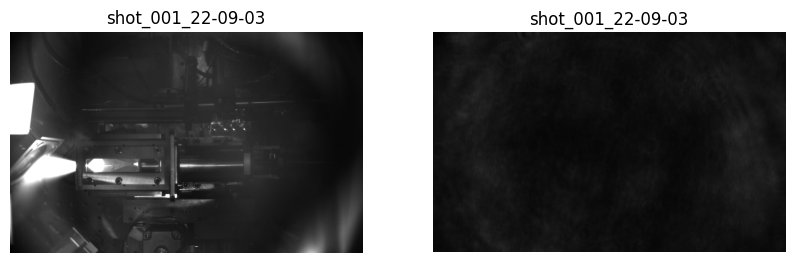

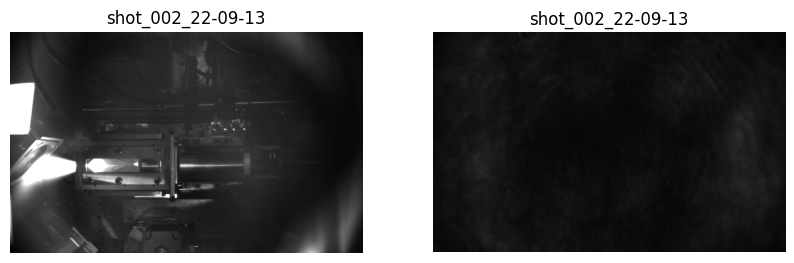

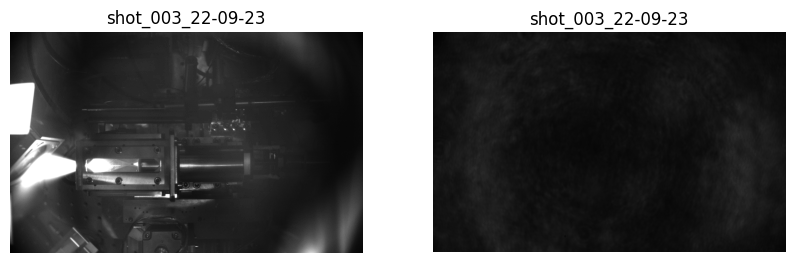

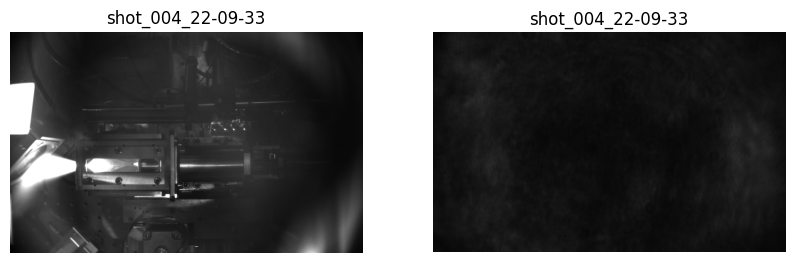

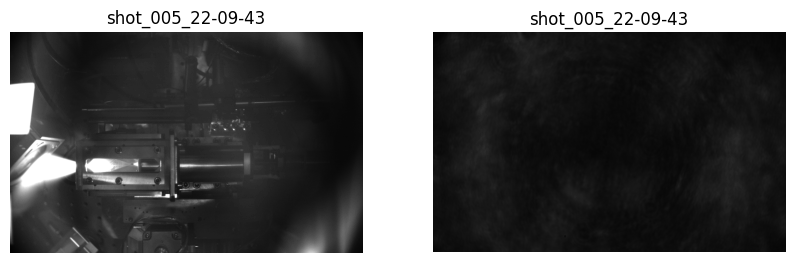

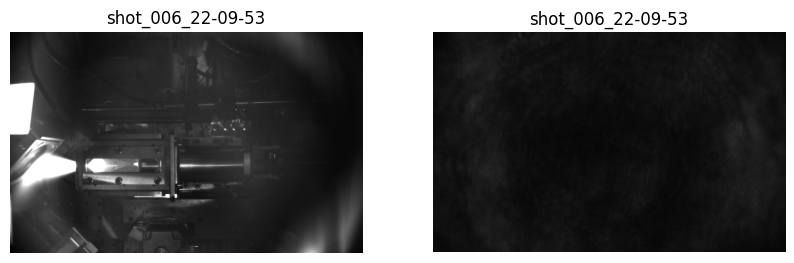

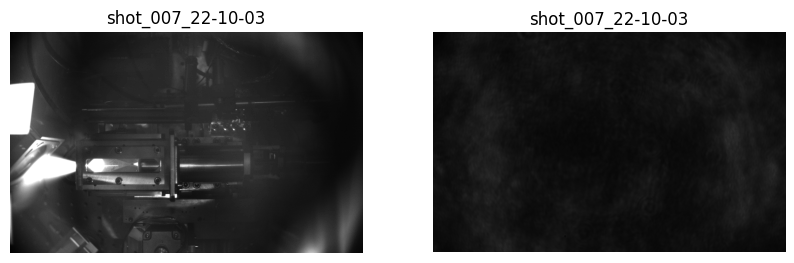

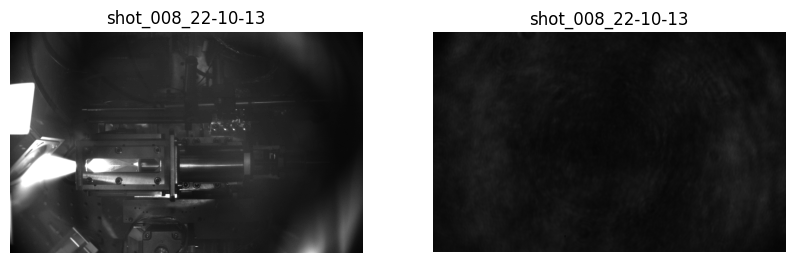

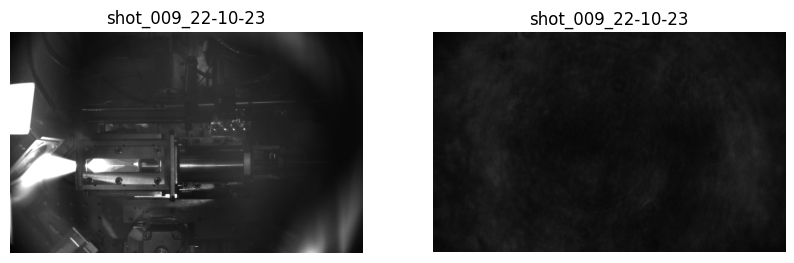

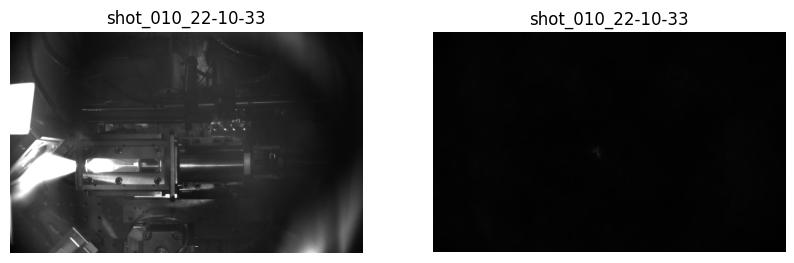

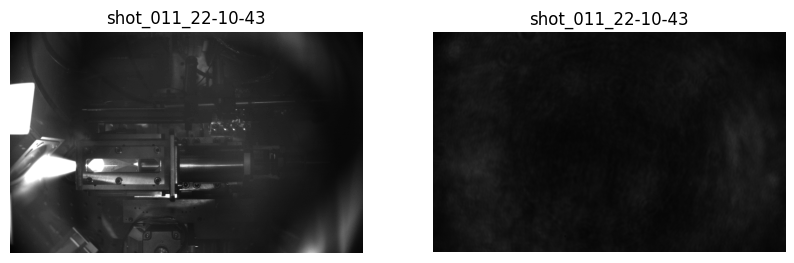

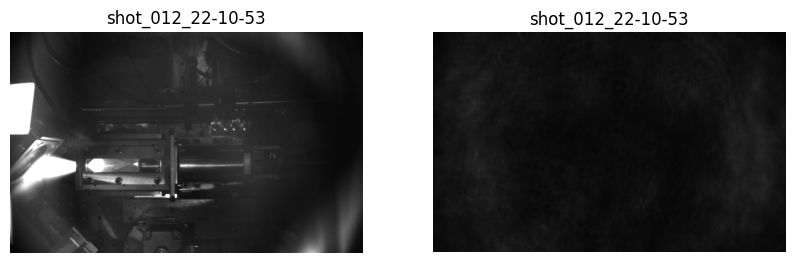

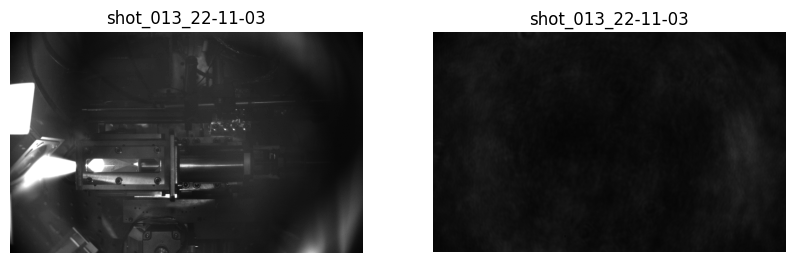

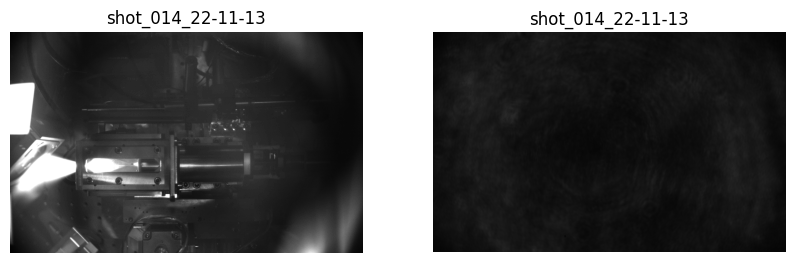

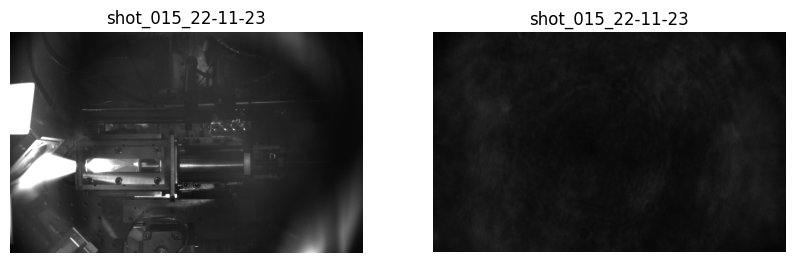

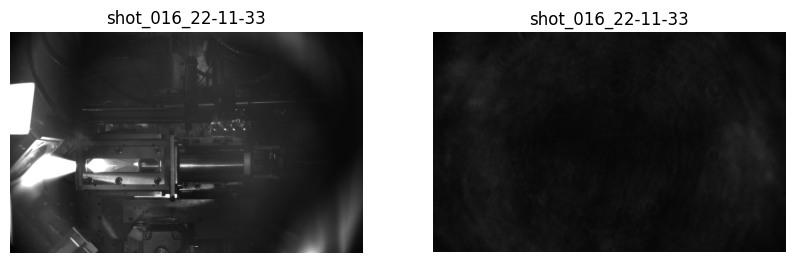

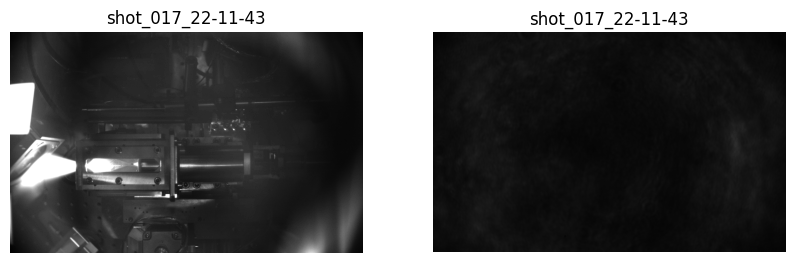

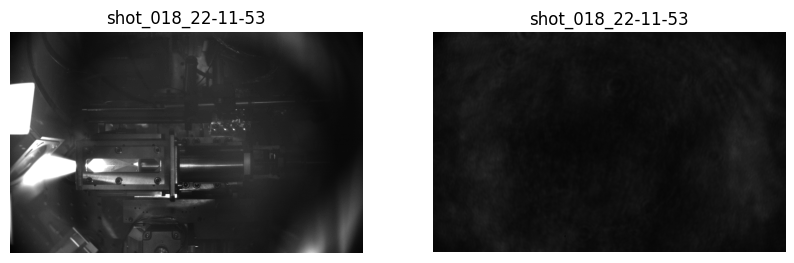

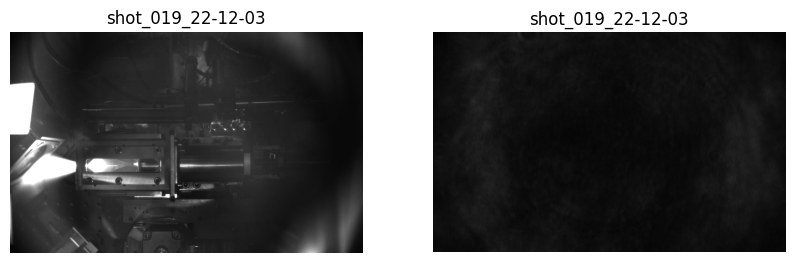

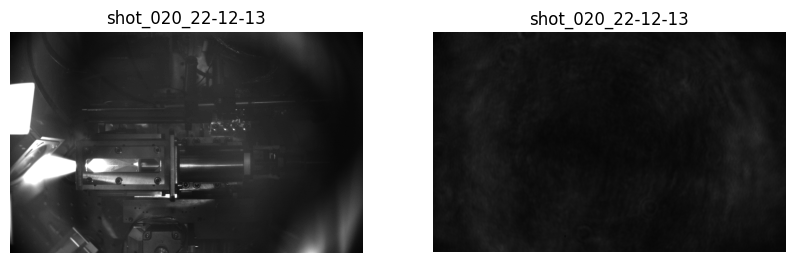

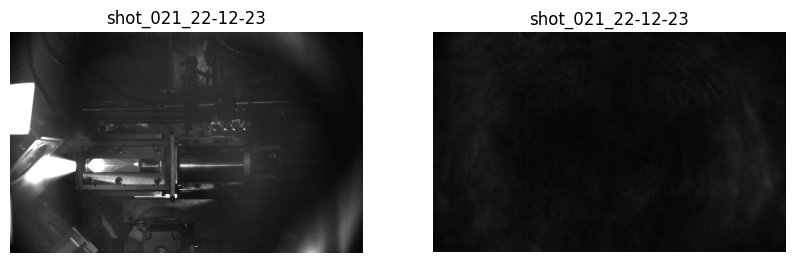

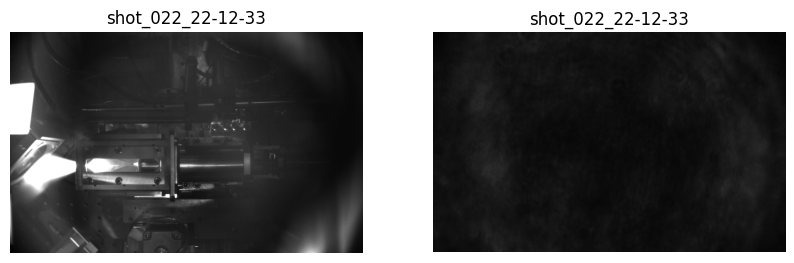

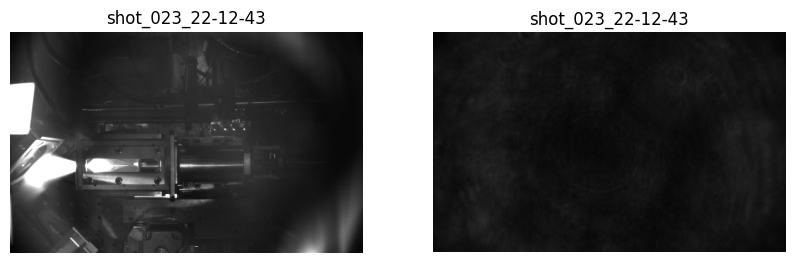

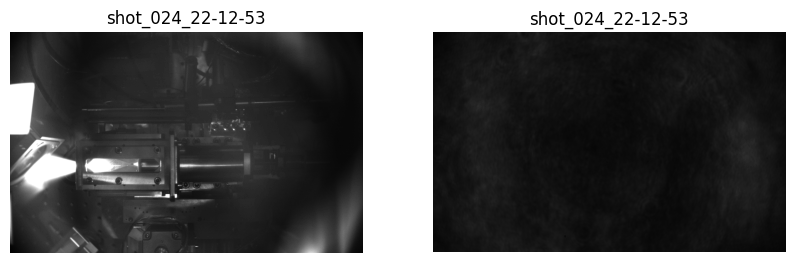

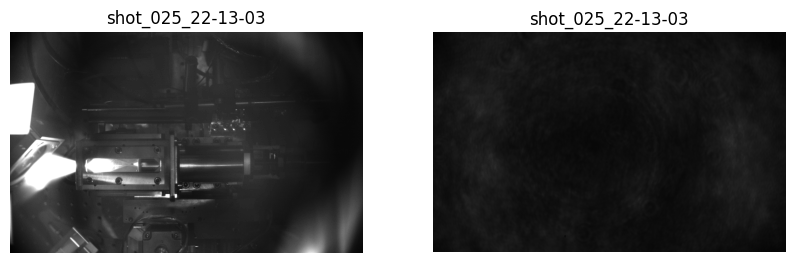

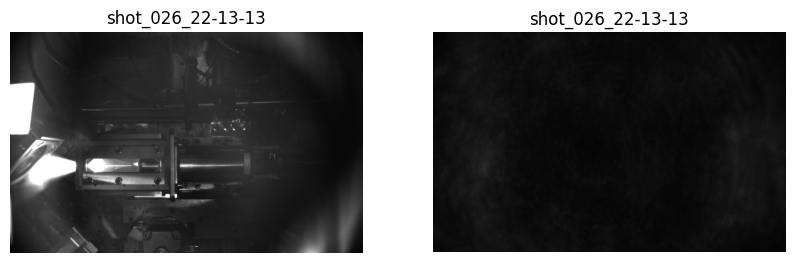

In [428]:
import os
import re
import cv2
import matplotlib.pyplot as plt
import numpy as np

def find_matching_files(folder1, folder2, common_string):
    matching_pairs = {}

    for file1 in os.listdir(folder1):
        if common_string in file1:
            timestamp1 = re.search(r'\d{3}_\d{2}-\d{2}-\d{2}\.\d{3}', file1)
            if timestamp1:
                print("Original 'shot' image:", file1)
                for file2 in os.listdir(folder2):
                    if common_string in file2:
                        timestamp2 = re.search(r'\d{3}_\d{2}-\d{2}-\d{2}\.\d{3}', file2)
                        if timestamp2:
                            if abs(int(timestamp1.group().split('.')[0].replace('_', '').replace('-', '').replace(':', '')) - 
                                   int(timestamp2.group().split('.')[0].replace('_', '').replace('-', '').replace(':', ''))) <= 100:
                                matching_pairs[file1] = file2
                                print("Matched image in the second folder:", file2)
                                break

    return matching_pairs

def increase_shadows(image, factor):
    # Convert to float for computation
    image = image.astype(np.float32)

    # Compute a mask for the shadows (pixels below a certain threshold)
    shadow_mask = image < 10000  # Example threshold, adjust as needed

    # Increase brightness of shadows by a certain factor
    image[shadow_mask] *= factor

    # Clip values to ensure they are within valid range
    image = np.clip(image, 0, 65535).astype(np.uint16)

    return image

def find_max_scale(folder2, common_string):
    max_value = 0

    for file2 in os.listdir(folder2):
        if common_string in file2:
            image2 = cv2.imread(os.path.join(folder2, file2), cv2.IMREAD_ANYDEPTH)
            max_value = max(max_value, np.max(image2))

    return max_value

def show_image_pairs(folder1, folder2, common_string):
    matching_pairs = find_matching_files(folder1, folder2, common_string)
    max_scale = find_max_scale(folder2, common_string)

    for idx, (file1, file2) in enumerate(matching_pairs.items(), start=1):
        image1 = cv2.imread(os.path.join(folder1, file1), cv2.IMREAD_ANYDEPTH)
        image2 = cv2.imread(os.path.join(folder2, file2), cv2.IMREAD_ANYDEPTH)

        # Compute scaling factor
        scale_factor = max_scale / np.max(image2)

        # Apply scaling factor to the second image
        image2_scaled = (image2 * scale_factor).astype(np.uint16)

        # Increase shadows in the first image
        shadow_factor = 50  # Increase shadows by a factor of 1.2
        image1_adjusted = increase_shadows(image1, shadow_factor)

        # Adjust brightness of the second image
        brightness_factor_image2 = 10.0  # Increase brightness by a factor of 10.0
        image2_adjusted = np.clip(image2_scaled * brightness_factor_image2, 0, 65535).astype(np.uint16)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(image1_adjusted, cmap='gray', vmin=0, vmax=65535)
        axes[0].set_title(file1.split('.')[0])  # Show only the shot filename in the title
        axes[0].axis('off')

        axes[1].imshow(image2_adjusted, cmap='gray', vmin=0, vmax=65535)
        axes[1].set_title(file2.split('.')[0])  # Show only the shot filename in the title
        axes[1].axis('off')

        plt.show()

# Example usage
folder1 = r"C:\Users\kalos\Documents\PMoPA_files\DAQ\240326\guide\40mbar\axi475probe485\run2\FluorescenceCam"
folder2 = r"C:\Users\kalos\Documents\PMoPA_files\DAQ\240326\guide\40mbar\axi475probe485\run2\ExitMode"
common_string = 'shot'

show_image_pairs(folder1, folder2, common_string)
